In [279]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [280]:
df = pd.read_csv('/content/tesla-stock-price.csv')
df.head()

,date,close,volume,open,high,low
0,11:34,270.49,"4,787,699",264.50,273.88,262.2400
1,2018/10/15,259.59,6189026.0000,259.06,263.28,254.5367
2,2018/10/12,258.78,7189257.0000,261.00,261.99,252.0100
3,2018/10/11,252.23,8128184.0000,257.53,262.25,249.0300
4,2018/10/10,256.88,12781560.0000,264.61,265.51,247.7700


In [281]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 757 entries, 0 to 756
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    757 non-null    object 
 1   close   757 non-null    float64
 2   volume  757 non-null    object 
 3   open    757 non-null    float64
 4   high    757 non-null    float64
 5   low     757 non-null    float64
dtypes: float64(4), object(2)
memory usage: 35.6+ KB


In [282]:
df.shape

(757, 6)

In [283]:
df.describe()

,close,open,high,low
count,757.000000,757.000000,757.000000,757.000000
mean,272.645614,272.760659,277.122776,268.017399
std,58.378585,58.449827,59.194761,57.515736
min,143.670000,142.320000,154.970000,141.050000
25%,219.560000,219.640000,222.569000,216.080000
50%,277.450000,277.625000,280.789900,273.550000
75%,322.690000,321.560000,327.120000,316.560100
max,385.000000,386.690000,389.610000,379.345000


In [284]:
df['volume'] = df['volume'].str.replace(',', '')
df['volume'] = df['volume'].astype(float)

In [285]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 757 entries, 0 to 756
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    757 non-null    object 
 1   close   757 non-null    float64
 2   volume  757 non-null    float64
 3   open    757 non-null    float64
 4   high    757 non-null    float64
 5   low     757 non-null    float64
dtypes: float64(5), object(1)
memory usage: 35.6+ KB


In [286]:
df.isnull().sum()

date      0
close     0
volume    0
open      0
high      0
low       0
dtype: int64

#EDA


In [287]:
df.isnull().sum()

date      0
close     0
volume    0
open      0
high      0
low       0
dtype: int64

##There are no null values

In [288]:
df=df.sort_values(by='date')
df.head()

,date,close,volume,open,high,low
0,11:34,270.49,4787699.0,264.50,273.8800,262.24
756,2015/10/15,221.31,2835920.0,216.43,221.7300,213.70
755,2015/10/16,227.01,4327574.0,223.04,230.4805,222.87
754,2015/10/19,228.10,2506836.0,226.50,231.1500,224.94
753,2015/10/20,213.03,14877020.0,227.72,228.6000,202.00


sorting the whole dataframe  according to increasing date



---



In [289]:
df=df.iloc[1:].reset_index()
df

,index,date,close,volume,open,high,low
0,756,2015/10/15,221.31,2835920.0,216.43,221.7300,213.7000
1,755,2015/10/16,227.01,4327574.0,223.04,230.4805,222.8700
2,754,2015/10/19,228.10,2506836.0,226.50,231.1500,224.9400
3,753,2015/10/20,213.03,14877020.0,227.72,228.6000,202.0000
4,752,2015/10/21,210.09,4177956.0,211.99,214.8100,208.8000
...,...,...,...,...,...,...,...
751,5,2018/10/09,262.80,12037780.0,255.25,266.7700,253.3000
752,4,2018/10/10,256.88,12781560.0,264.61,265.5100,247.7700
753,3,2018/10/11,252.23,8128184.0,257.53,262.2500,249.0300
754,2,2018/10/12,258.78,7189257.0,261.00,261.9900,252.0100


removed the 1st row because it want in correct formet



---



In [290]:
df = df.drop(['index'], axis=1)
df.index.name = 'index'

dropping the index column because after sorting the index has changed

---



In [291]:
df.head()

,date,close,volume,open,high,low
index,,,,,,
0,2015/10/15,221.31,2835920.0,216.43,221.7300,213.70
1,2015/10/16,227.01,4327574.0,223.04,230.4805,222.87
2,2015/10/19,228.10,2506836.0,226.50,231.1500,224.94
3,2015/10/20,213.03,14877020.0,227.72,228.6000,202.00
4,2015/10/21,210.09,4177956.0,211.99,214.8100,208.80


In [292]:
df = df.reset_index().rename(columns={'index': 'index'})

setting another column called AS index so that it have continuity in index number

---



In [293]:
df.head()

,index,date,close,volume,open,high,low
0,0,2015/10/15,221.31,2835920.0,216.43,221.7300,213.70
1,1,2015/10/16,227.01,4327574.0,223.04,230.4805,222.87
2,2,2015/10/19,228.10,2506836.0,226.50,231.1500,224.94
3,3,2015/10/20,213.03,14877020.0,227.72,228.6000,202.00
4,4,2015/10/21,210.09,4177956.0,211.99,214.8100,208.80


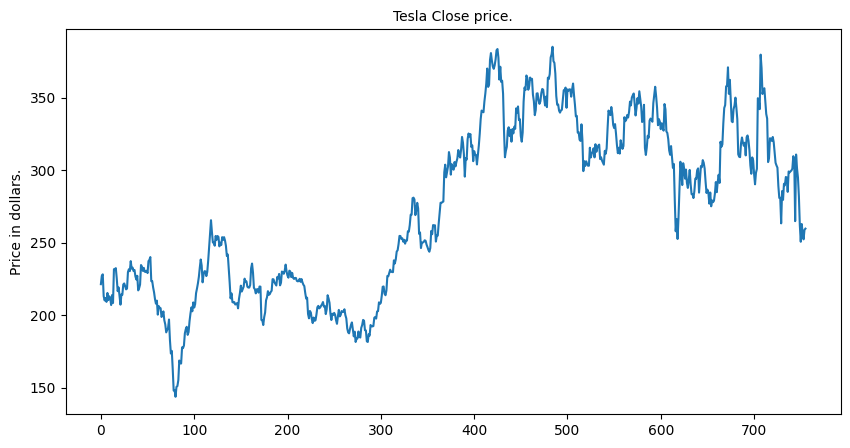

In [294]:
plt.figure(figsize=(10,5))
plt.plot(df['close'])
plt.title('Tesla Close price.', fontsize=10)
plt.ylabel('Price in dollars.')
plt.show()

through the above diagram we can say that there is increasing positive trend

---



In [295]:
df.columns

Index(['index', 'date', 'close', 'volume', 'open', 'high', 'low'], dtype='object')

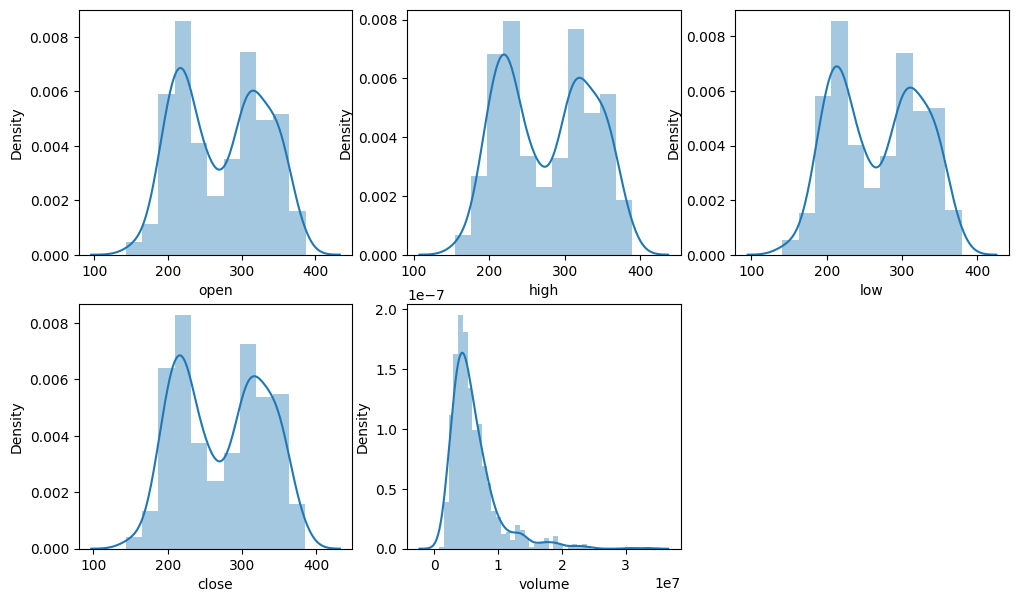

In [296]:

features = ['open', 'high', 'low', 'close', 'volume']

plt.subplots(figsize=(12,7))

for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.distplot(df[col])
plt.show()

through above diagrams we can conclude that open ,close, high ,low has two peaks and volume graph is left skewed

---



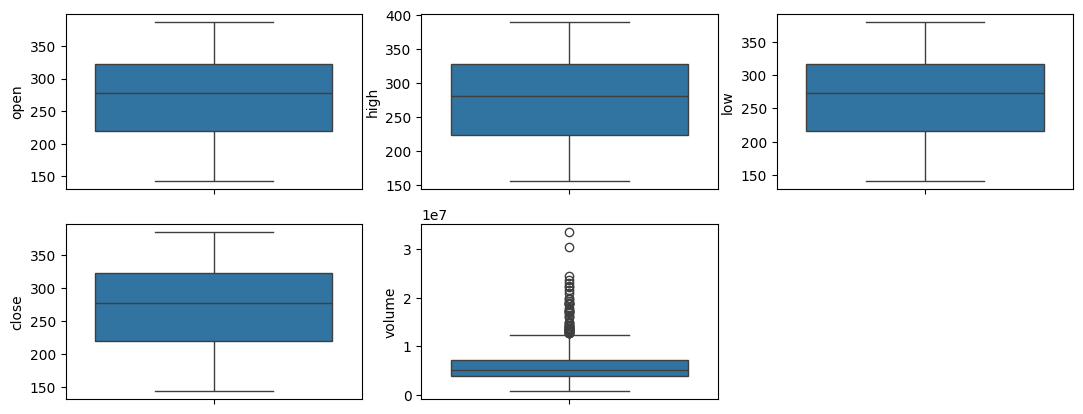

In [297]:

plt.subplots(figsize=(13,5))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.boxplot(df[col])
plt.show()

##Thus through above box plot we can conclude  only volume column had outliers and other columns doesnt contain outliers



---



#Feature engineering

In [298]:
import pandas as pd
df['day'] = pd.to_datetime(df['date']).dt.day
df['month'] = pd.to_datetime(df['date']).dt.month
df['year'] = pd.to_datetime(df['date']).dt.year
df.head()


,index,date,close,volume,open,high,low,day,month,year
0,0,2015/10/15,221.31,2835920.0,216.43,221.7300,213.70,15,10,2015
1,1,2015/10/16,227.01,4327574.0,223.04,230.4805,222.87,16,10,2015
2,2,2015/10/19,228.10,2506836.0,226.50,231.1500,224.94,19,10,2015
3,3,2015/10/20,213.03,14877020.0,227.72,228.6000,202.00,20,10,2015
4,4,2015/10/21,210.09,4177956.0,211.99,214.8100,208.80,21,10,2015


converting date column into other 3 columns as day ,month and year

---



In [299]:
df['quarter_end'] = np.where(df['month']%3==0,1,0)
df.tail()

,index,date,close,volume,open,high,low,day,month,year,quarter_end
751,751,2018/10/09,262.80,12037780.0,255.25,266.77,253.3000,9,10,2018,0
752,752,2018/10/10,256.88,12781560.0,264.61,265.51,247.7700,10,10,2018,0
753,753,2018/10/11,252.23,8128184.0,257.53,262.25,249.0300,11,10,2018,0
754,754,2018/10/12,258.78,7189257.0,261.00,261.99,252.0100,12,10,2018,0
755,755,2018/10/15,259.59,6189026.0,259.06,263.28,254.5367,15,10,2018,0


A quarter is nothing but three months cycle. Every company prepares it quarterly results and publishes them publicly so, that people can analyze the company’s performance. These quarterly results affect the stock prices heavily which is why we have added this feature because this can be a helpful feature for the learning model.



---



In [300]:
df['quarter_end'].value_counts()

quarter_end
0    502
1    254
Name: count, dtype: int64

totally we have '502 0 values' and  '254 1 values'

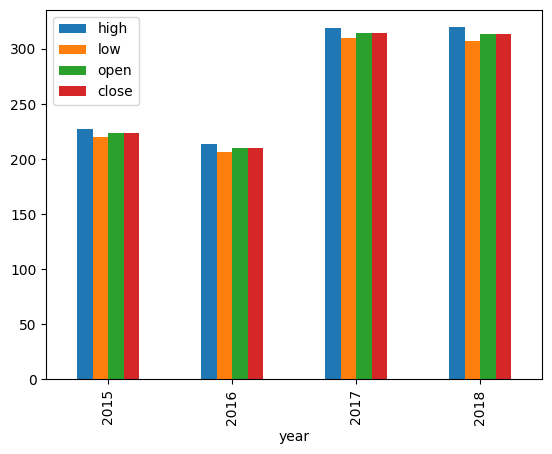

In [301]:
import matplotlib.pyplot as plt
df_year = df.groupby('year').agg({'high': 'mean', 'low': 'mean', 'open': 'mean', 'close': 'mean'})
df_year.plot(kind='bar')
plt.show()


In [308]:
df.dtypes

index            int64
date            object
close          float64
volume         float64
open           float64
high           float64
low            float64
day              int32
month            int32
year             int32
quarter_end      int64
dtype: object

In [318]:
df.groupby('quarter_end').agg({'high': 'mean', 'low': 'mean', 'open': 'mean', 'close': 'mean', 'volume': 'mean', 'day': 'mean', 'month': 'mean', 'year': 'mean'})

,high,low,open,close,volume,day,month,year
quarter_end,,,,,,,,
0,276.030614,266.851641,271.712826,271.558685,6.237224e+06,15.627490,6.107570,2016.816733
1,279.294067,270.344123,274.864094,274.802283,5.974234e+06,15.862205,7.417323,2016.728346


In [320]:
df['open-close']  = df['open'] - df['close']
df['low-high']  = df['low'] - df['high']
df['target'] = np.where(df['close'].shift(-1) > df['close'], 1, 0)

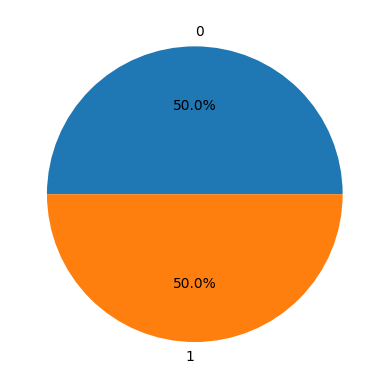

In [321]:
plt.pie(df['target'].value_counts().values,
        labels=[0, 1], autopct='%1.1f%%')
plt.show()

In [324]:
df.columns

Index(['index', 'date', 'close', 'volume', 'open', 'high', 'low', 'day',
       'month', 'year', 'quarter_end', 'open-close', 'low-high', 'target'],
      dtype='object')

In [331]:
df1=df[['close', 'volume', 'open', 'high', 'low', 'day',
       'month', 'year', 'quarter_end', 'open-close', 'low-high', 'target']]


,close,volume,open,high,low,day,month,year,quarter_end,open-close,low-high,target
0,221.31,2835920.0,216.43,221.7300,213.70,15,10,2015,0,-4.88,-8.0300,1
1,227.01,4327574.0,223.04,230.4805,222.87,16,10,2015,0,-3.97,-7.6105,1
2,228.10,2506836.0,226.50,231.1500,224.94,19,10,2015,0,-1.60,-6.2100,0
3,213.03,14877020.0,227.72,228.6000,202.00,20,10,2015,0,14.69,-26.6000,0
4,210.09,4177956.0,211.99,214.8100,208.80,21,10,2015,0,1.90,-6.0100,1


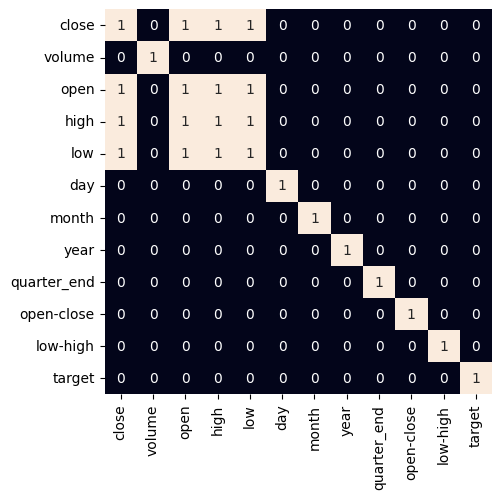

In [333]:

plt.figure(figsize=(5,5))

sb.heatmap(df1.corr() > 0.9, annot=True, cbar=False)
plt.show()

##Data Splitting and Normalization


In [336]:
features = df[['open-close', 'low-high', 'quarter_end']]
target = df['target']
scaler = StandardScaler()
features=scaler.fit_transform(features)
X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)


(680, 3) (76, 3)


##Model Development and Evaluation


In [337]:
models = [LogisticRegression(), SVC(
  kernel='poly', probability=True), XGBClassifier()]

for i in range(3):
  models[i].fit(X_train, Y_train)

  print(f'{models[i]} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(
    Y_train, models[i].predict_proba(X_train)[:,1]))
  print('Validation Accuracy : ', metrics.roc_auc_score(
    Y_valid, models[i].predict_proba(X_valid)[:,1]))
  print()

LogisticRegression() : 
Training Accuracy :  0.5561611128412747
Validation Accuracy :  0.4902777777777778

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.5435914737534171
Validation Accuracy :  0.5128472222222222

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training 

among the 3 models , XGBclassifier has the highest performance but due looking at training and validation values we can clearly note that XGBclassifier pruned to overfitting . SVC() has almost similar training and validation  score

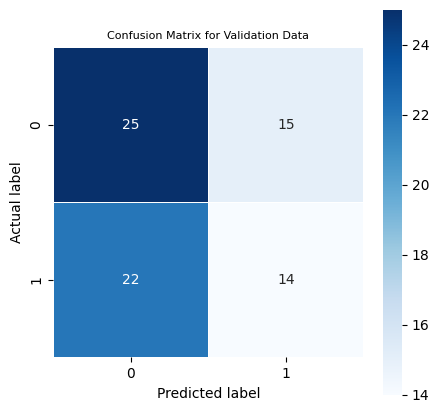

In [347]:
y_pred = models[1].predict(X_valid)
cm = metrics.confusion_matrix(Y_valid, y_pred)
plt.figure(figsize=(5,5))
sb.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square=True, cmap='Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix for Validation Data', size=8)
plt.show()


##Interpretation

Accuracy (~51.3%): The classifier correctly predicts the class about half of the time. This suggests there is room for improvement.

Precision (~53.2%): Out of all the positive predictions, only about 53.2% are actually positive. This indicates a relatively high rate of false positives (22).

Recall (62.5%): The classifier correctly identifies 62.5% of all actual positives, meaning it misses 37.5% of true positives (15 false negatives).

Specificity (38.9%): The classifier correctly identifies only 38.9% of all actual negatives. This low specificity indicates a high rate of false positives.

F1 Score (57.4%): Balances the precision and recall, indicating moderate performance with a slight bias towards recall.

##Overall Indications
High False Positives (FP = 22): The classifier tends to incorrectly classify negatives as positives. This could be problematic in applications where false alarms are costly.

Moderate False Negatives (FN = 15): The classifier misses some positive instances but not excessively.

##To improve the model, consider:

Adjusting the decision threshold if using a probabilistic classifier.
Using different features or more data.

Trying different algorithms or models.

Balancing the dataset if there is class imbalance.
The choice of focus (e.g., reducing false positives vs. false negatives) depends on the specific application and the costs associated with these errors.





#thankyou